In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Block_1 = pd.read_csv('Blocks/Block 1.csv')
# test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

## 查看特征之间的相关性

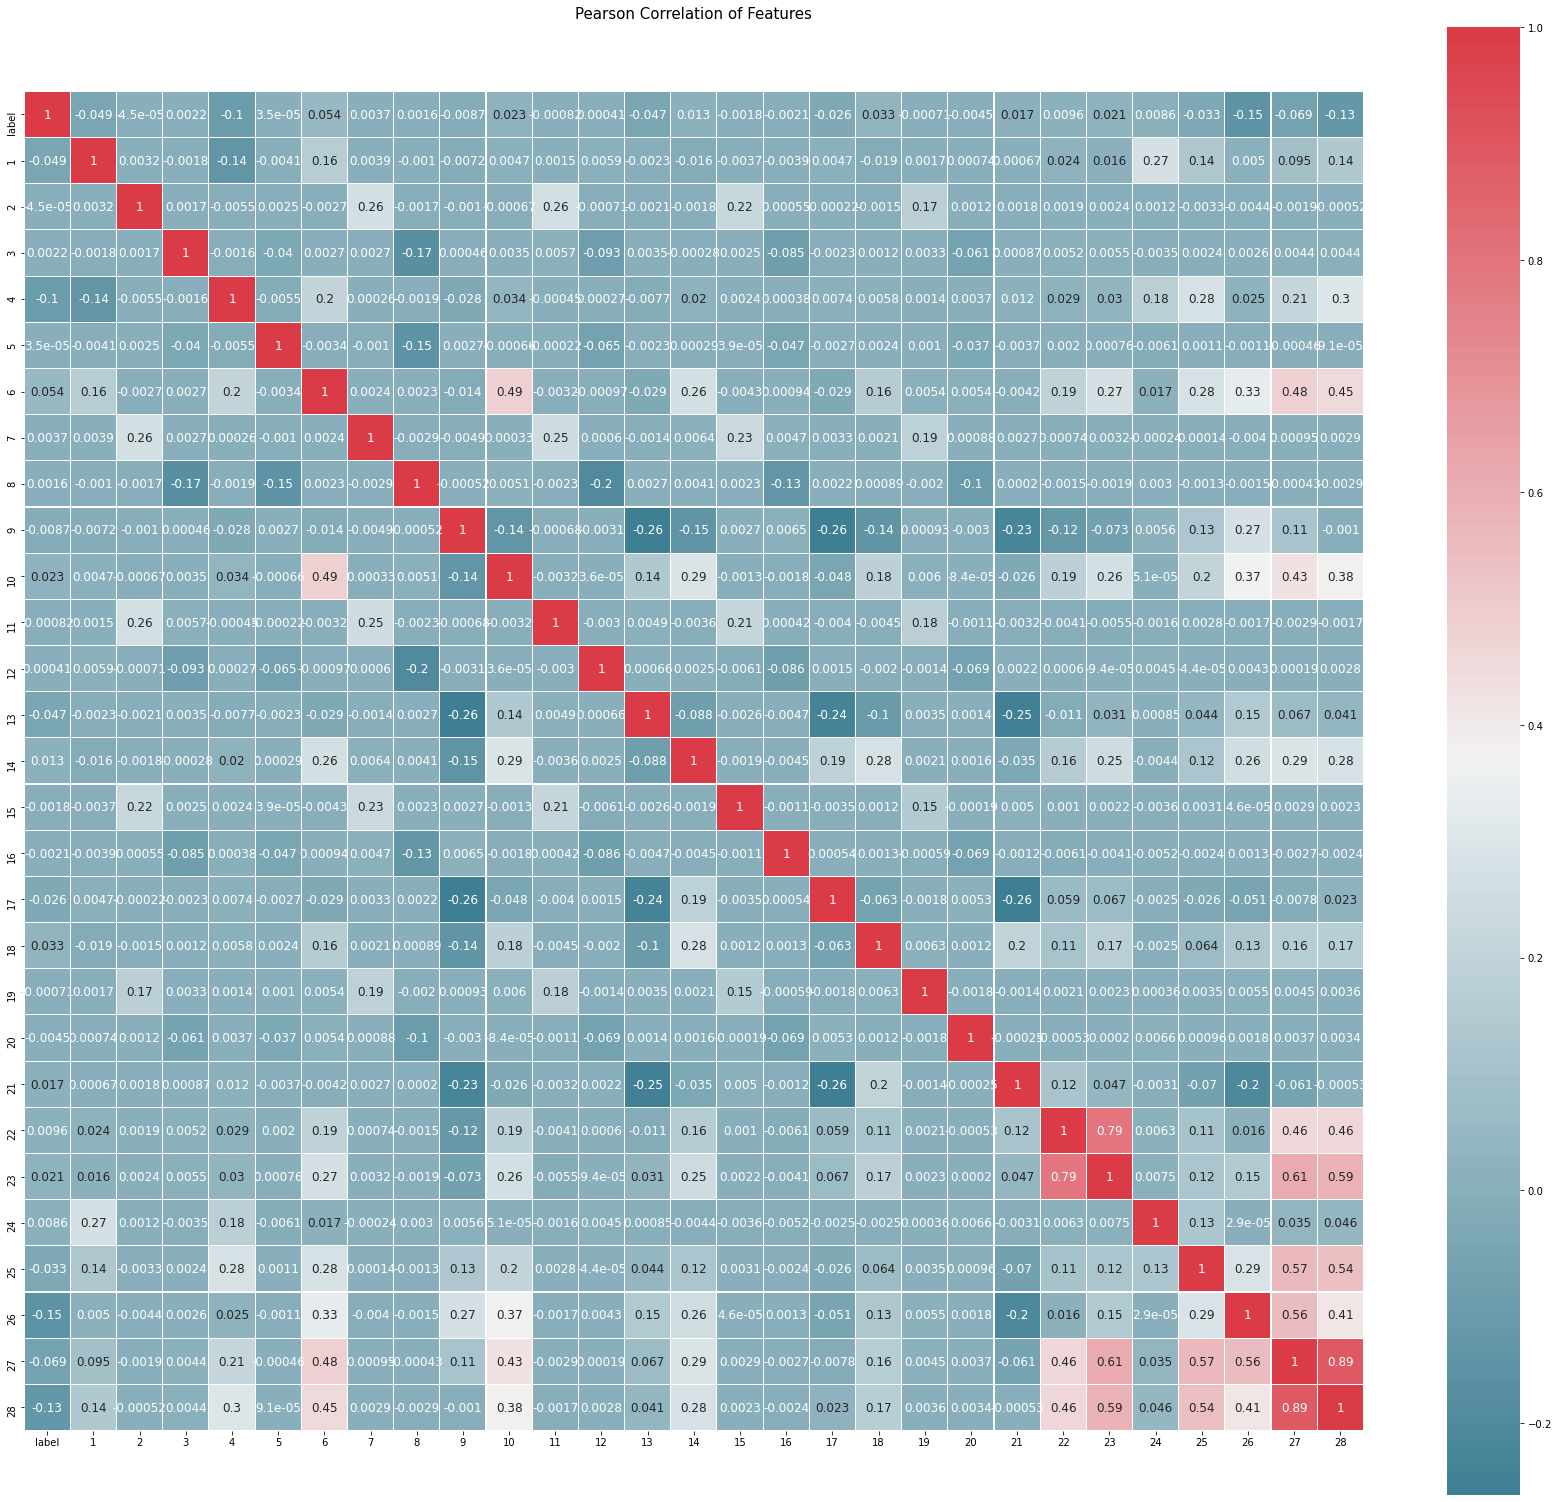

In [109]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(30, 30))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(Block_1)

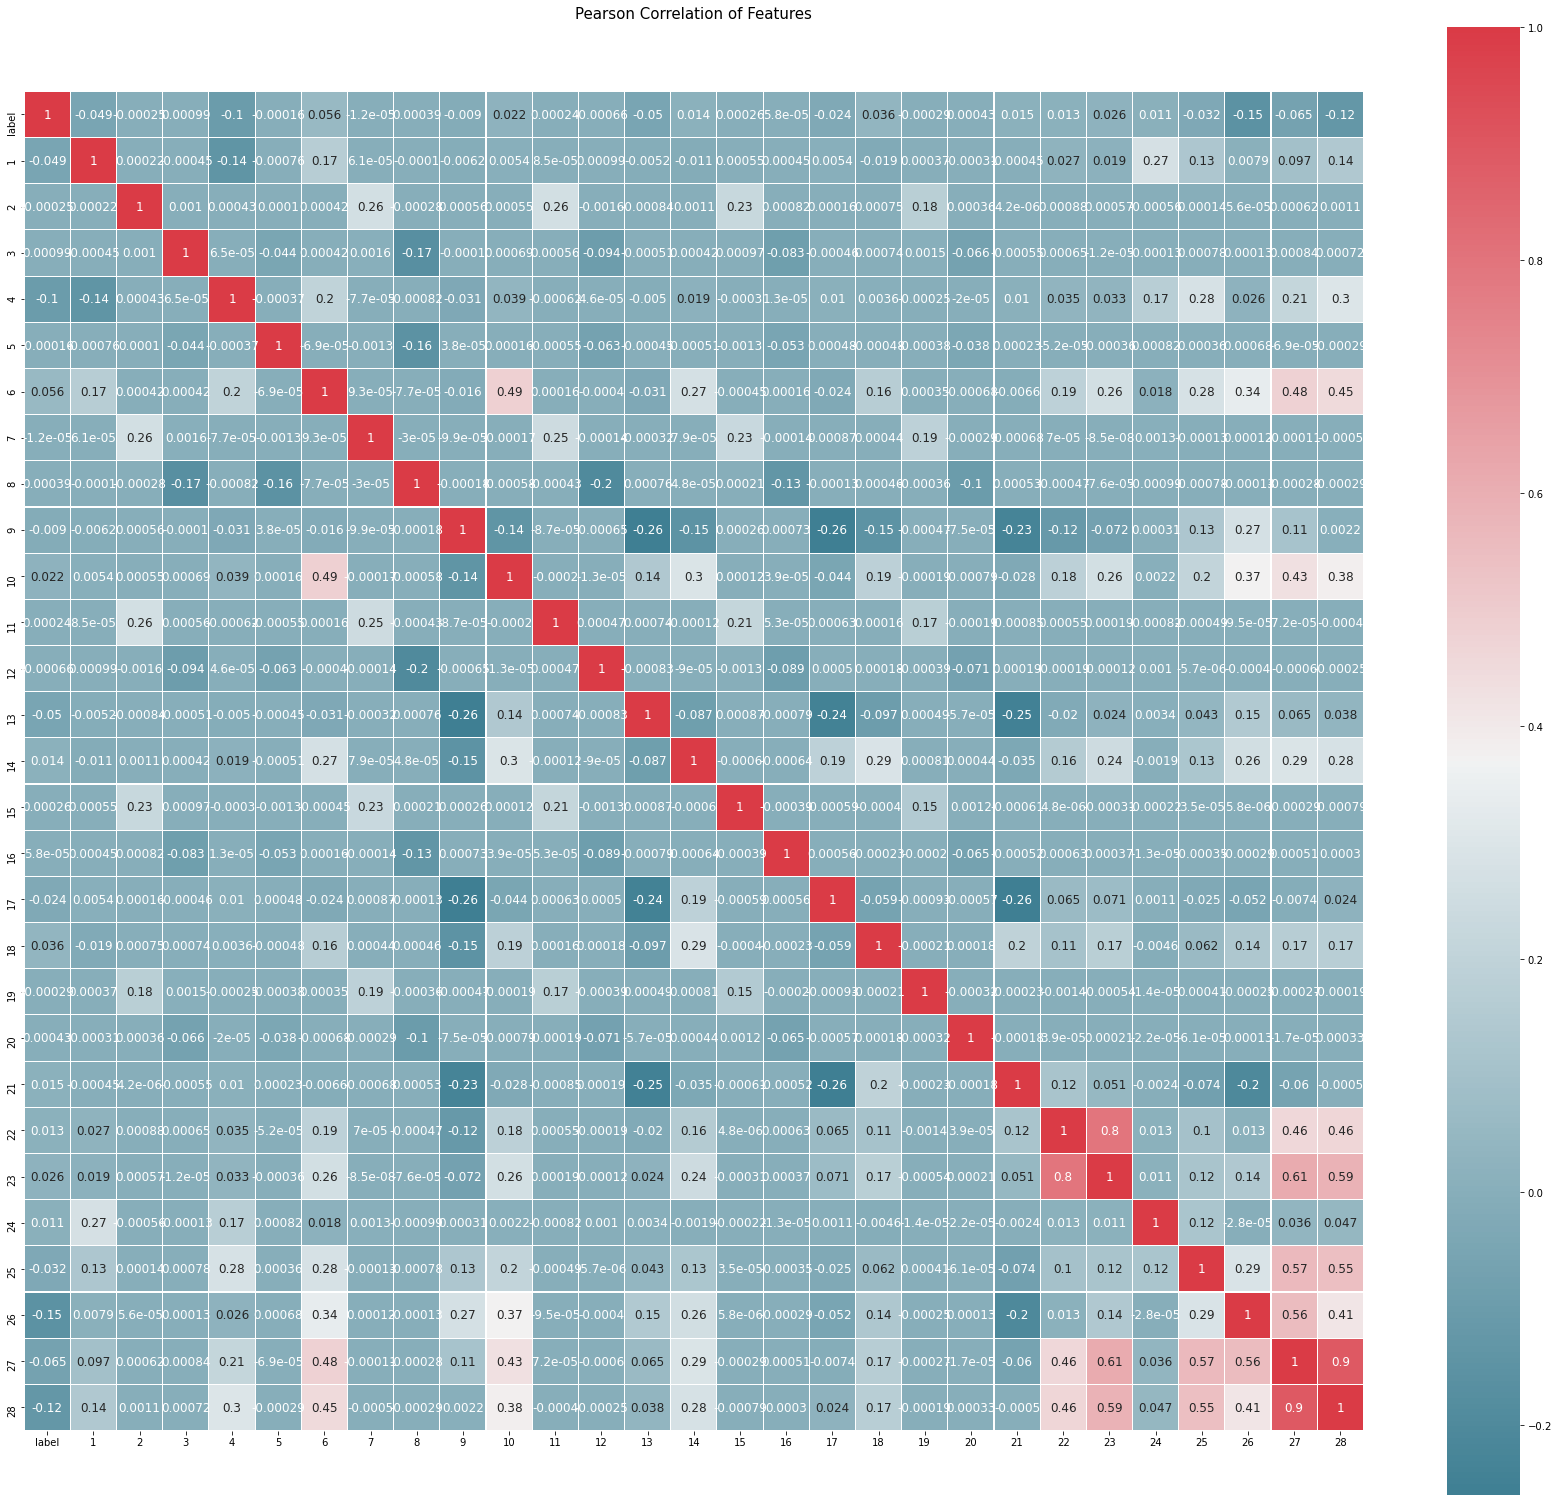

In [111]:
## Test set 里的相关性
correlation_heatmap(test)

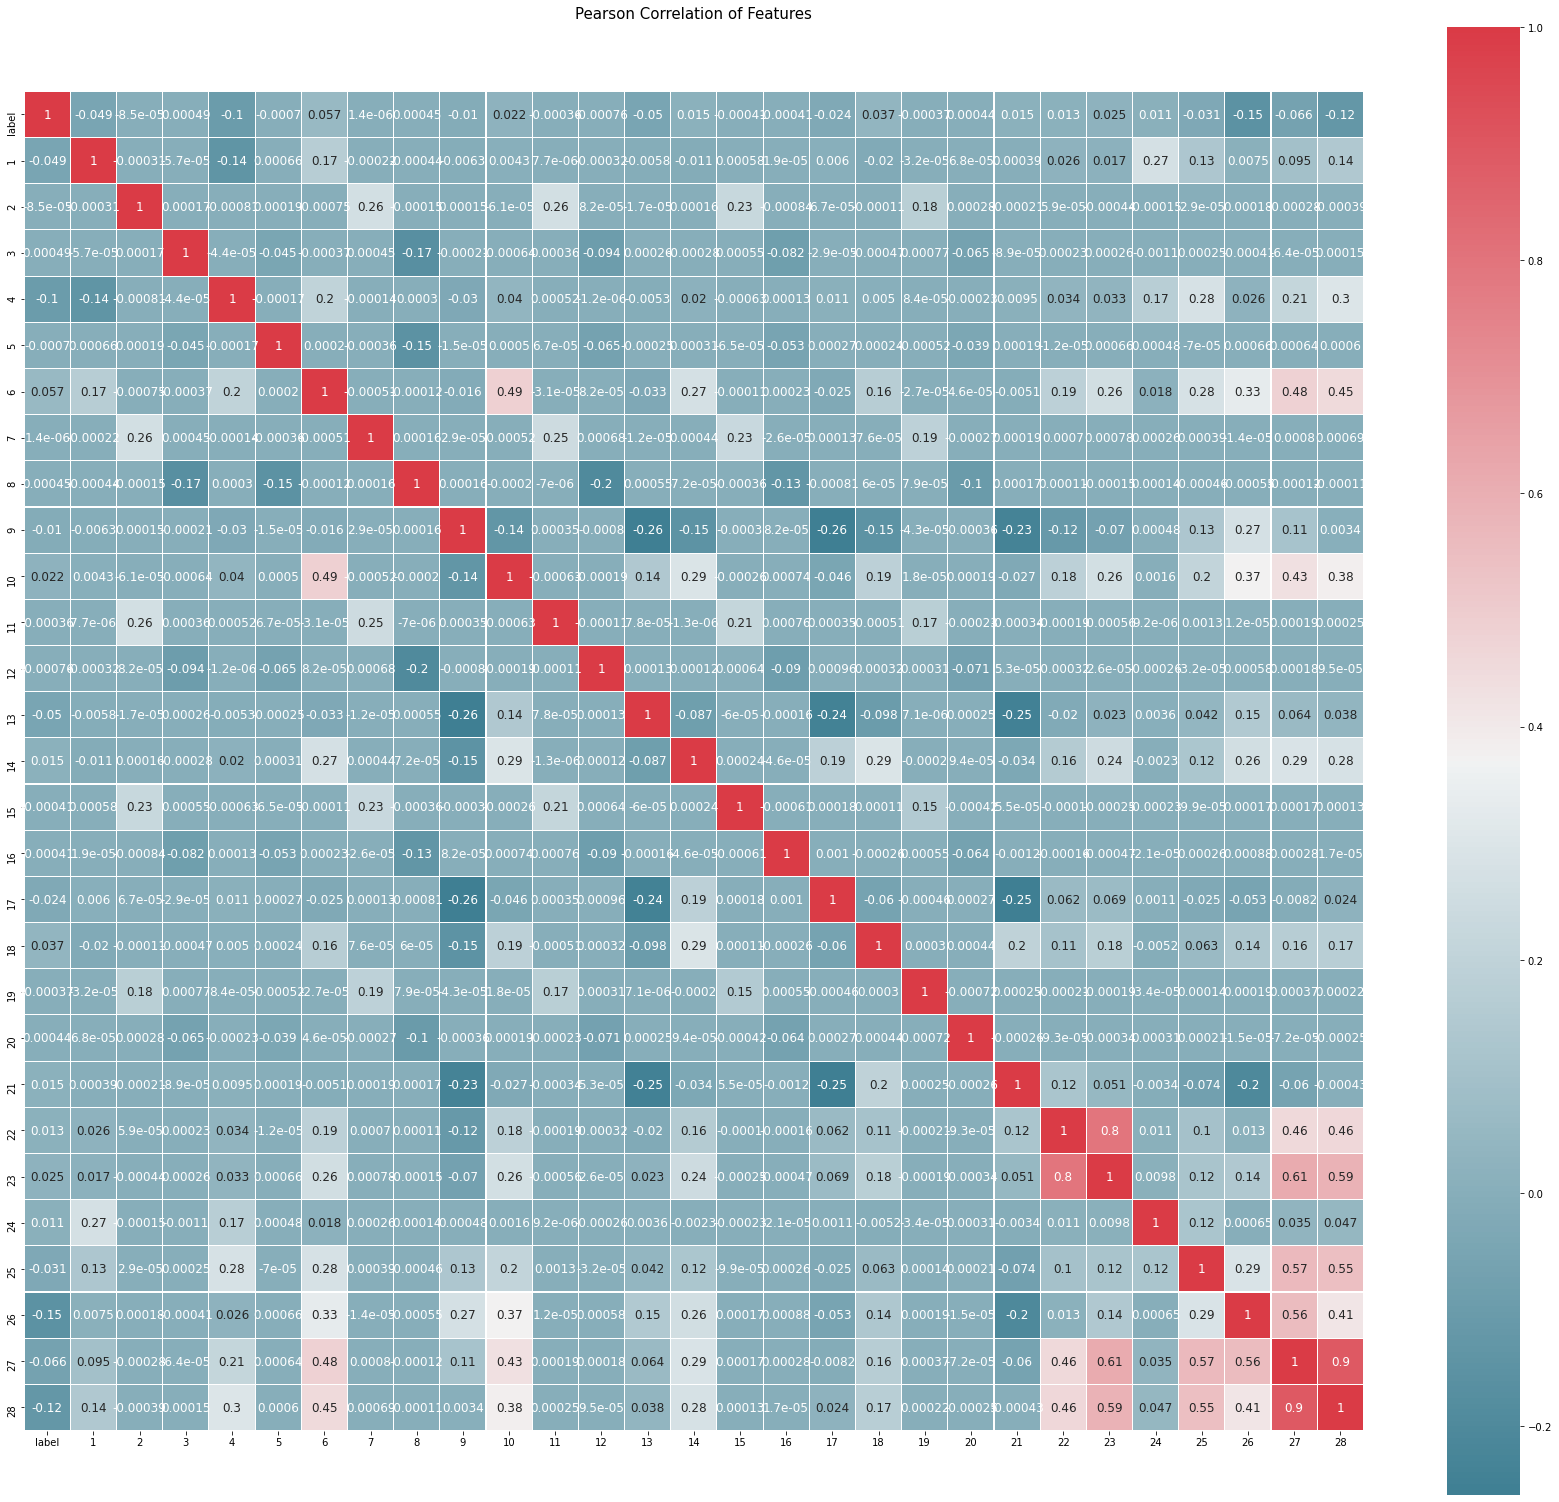

In [137]:
## Train set 里的相关性
correlation_heatmap(train)

In [29]:
#  将相关性系数大于某个阈值显示出来
def Feature_Selection(block,stop):
    corr=block.corr().abs().values
    threshold=0.9
    while threshold>stop:
        print(str(threshold)+': ')
        for i in range(len(corr)):
            for j in range(i):
                if i!=j and corr[i][j] >=threshold :
                    print(i,j)
        threshold-=0.1
        print('------------------')


### 假如用Pearson相关性系数进行特征选择的话，这几列是线性相关系数超过0.7的

In [32]:
Feature_Selection(train,0.40)

0.9: 
------------------
0.8: 
28 27
------------------
0.7000000000000001: 
23 22
28 27
------------------
0.6000000000000001: 
23 22
27 23
28 27
------------------
0.5000000000000001: 
23 22
27 23
27 25
27 26
28 23
28 25
28 27
------------------
0.40000000000000013: 
10 6
23 22
27 6
27 10
27 22
27 23
27 25
27 26
28 6
28 22
28 23
28 25
28 26
28 27
------------------


### PCA，用奇异值分解的方式求出 特征值和特征向量

In [4]:
# 输入某个数据块，将其特征值分解并
def myPCA(data):
    X=data.drop('label',axis=1)
    X_demean=X-X.mean()
    C=X_demean.T@X_demean/len(X_demean)
    U,S,V=np.linalg.svd(C)


    contributions=[0]
    for i in range(len(S)):
        contributions.append( contributions[-1]+S[i]/np.sum(S) )
    contributions=np.array(contributions)

    plt.scatter( len(contributions[contributions<0.99]),0.99,color='r',marker='x',s=150 ,label='99% K = '+str(len(contributions[contributions<0.99])))
    plt.scatter( len(contributions[contributions<0.95]),0.95,color='orange',marker='x',s=150 ,label='95% K = '+str(len(contributions[contributions<0.95])))
    plt.scatter( len(contributions[contributions<0.90]),0.90,color='green',marker='x',s=150 ,label='90% K = '+str(len(contributions[contributions<0.90])))

    plt.plot(contributions)
    plt.title('Contribution')
    plt.legend()
    
    return U,S,V


### PCA，特征值和特征向量，降维到24个特征就可以保留原样本99%的方差
假如我们需要降维，可以直接使用对应的特征向量U将原数据投影后再进行训练

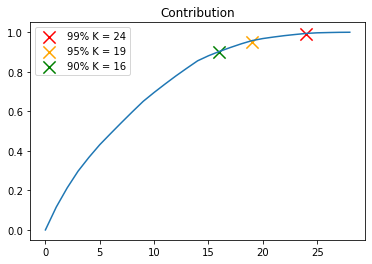

In [5]:
U,S,V=myPCA(train)

In [18]:
np.save('U',U)
np.save('S',S)
np.save('V',V)


## PCA+Peason  相关系数

In [8]:
Feature_Selection(train,0.7)

23 22
28 27


In [ ]:
Picked_train=train.drop([''])

In [12]:
x=train['23'].values
y=train['22'].values

In [26]:
a=train.head(100)

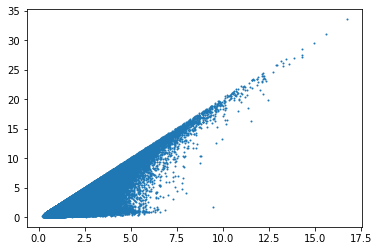

In [24]:
plt.scatter(x,y,s=1)

In [ ]:
color={0:'red',1:'blue'}

%matplotlib inline
plt.figure(figsize=(42,42))

pd.plotting.scatter_matrix(train,diagonal='kde',figsize=(42,42),marker='.',alpha=0.8,s=1,c=train['label'].apply(lambda x:color[x]),label=True)
plt.savefig("scatter_matrix.png")

# pd.plotting.scatter_matrix(a)

,label,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.493210,0.866778,-0.830316,2.571520,-0.279262,0.809716,0.387154,1.601197,0.000000,...,-0.314435,1.122981,0.000000,0.597446,0.763127,0.987707,1.534347,0.829040,1.518393,1.263348
1,0.0,0.655356,0.731396,0.241781,3.067170,-0.474623,2.183550,1.168446,0.791809,0.000000,...,0.449264,-1.371455,3.101961,0.619959,0.563526,1.180472,0.719782,0.591422,0.671538,0.645881
2,1.0,0.593681,0.027217,1.743236,1.053611,0.763017,0.723880,-1.656680,-1.571044,0.000000,...,0.505896,0.130798,3.101961,0.833194,0.999375,0.981343,1.028082,0.869200,0.936227,0.969262
3,0.0,1.616885,-1.265240,-0.433588,0.528759,1.540286,0.923767,-0.240651,1.256375,2.173076,...,-1.889304,0.005943,0.000000,0.815824,1.041715,1.253270,1.269991,0.848547,0.940010,0.884574
4,1.0,1.080669,0.221037,1.049104,1.071846,1.363433,1.124387,0.970400,1.130532,2.173076,...,0.775731,-0.477488,0.000000,1.198861,0.985718,0.978730,1.124434,1.690711,1.168876,1.109496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7699995,1.0,0.584714,-1.178556,-0.188339,0.794427,0.403788,1.368795,-0.857565,-1.476246,0.000000,...,1.129680,0.299491,1.550981,0.674658,0.825301,0.988698,2.312058,1.010982,1.551424,1.179406
7699996,0.0,1.019178,-1.129858,0.202941,0.931024,0.309339,1.932271,-0.941734,0.446987,2.173076,...,0.096980,-1.561234,3.101961,0.933556,0.543439,0.981976,1.065070,1.201662,1.536492,1.455431
7699997,1.0,0.971595,0.142145,-1.318594,0.792834,-0.484025,2.028367,-0.064390,1.121108,2.173076,...,0.128627,0.035908,3.101961,0.970948,0.888255,0.988658,1.543128,1.359079,1.360428,1.166613
7699998,1.0,0.924196,2.203063,0.697322,0.845330,-0.303296,0.795242,0.629761,-1.033300,2.173076,...,2.282308,-1.689974,0.000000,0.330149,1.140041,0.989200,0.811820,0.869579,0.938615,0.813527
